In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rc('font',family='AppleGothic')

In [136]:
df=pd.read_csv('data/raw_data/train.csv',index_col=0)
df.reset_index(inplace=True)

df['year']=df['일시'].apply(lambda x:str(x)[:4])

df_2018=df[df['year']=='2018']
df_2019=df[df['year']=='2019']
df_2020=df[df['year']=='2020']
df_2021=df[df['year']=='2021']



ans=pd.read_csv('data/trial/smooth_ratio.csv',index_col=0)

In [138]:
ans.mean()

광진구     10.426800
동대문구     8.546279
성동구      8.885809
중랑구      6.200570
dtype: float64

In [139]:
temp=ans/1.2

In [140]:
temp.mean()

광진구     8.689000
동대문구    7.121899
성동구     7.404841
중랑구     5.167141
dtype: float64

In [132]:
a=temp*ratio

In [114]:
pd.concat([pd.DataFrame(df_2018.iloc[:,1:5].mean()),pd.DataFrame(df_2019.iloc[:,1:5].mean()),pd.DataFrame(df_2020.iloc[:,1:5].mean()),pd.DataFrame(df_2021.iloc[:,1:5].mean())],axis=1).diff(axis=1).iloc[:,1:].mean(axis=1)

광진구     1.556221
동대문구    1.563890
성동구     1.286621
중랑구     1.126701
dtype: float64

In [125]:
temp=pd.concat([pd.DataFrame(df_2018.iloc[:,1:5].mean()),pd.DataFrame(df_2019.iloc[:,1:5].mean()),pd.DataFrame(df_2020.iloc[:,1:5].mean()),pd.DataFrame(df_2021.iloc[:,1:5].mean())],axis=1).diff(axis=1).iloc[:,1:]

In [126]:
temp.columns = [2019,2020,2021]

In [128]:
ratio=(temp[2019]*1 + temp[2020]*2 + temp[2021]*3)/6

In [92]:
pd.DataFrame(df_2018.iloc[:,1:5].mean())

,0
광진구,3.497041
동대문구,1.969063
성동구,3.058011
중랑구,1.399266


In [100]:
pd.concat([pd.DataFrame(df_2018.iloc[:,1:5].mean()),pd.DataFrame(df_2019.iloc[:,1:5].mean()),pd.DataFrame(df_2020.iloc[:,1:5].mean()),pd.DataFrame(df_2021.iloc[:,1:5].mean())],axis=1).diff(axis=1).iloc[:,1:].mean(axis=1)

광진구     1.556221
동대문구    1.563890
성동구     1.286621
중랑구     1.126701
dtype: float64

In [134]:
a.to_csv('ratio_diff_mean_v2.csv')

In [68]:
df_2021.set_index('일시',inplace=True)

,광진구,동대문구,성동구,중랑구
일시,,,,
20220101,1.916511,1.811358,1.570736,1.331545
20220102,2.496555,2.217737,2.342085,1.623851
20220103,2.526410,2.470585,2.310154,1.578889
20220104,2.350463,2.260866,2.168947,1.440757
20220105,3.242531,2.916090,3.050171,1.947299
...,...,...,...,...
20221126,8.155365,6.519692,6.687024,4.943655
20221127,7.056591,5.702661,5.731745,4.298668
20221128,7.604653,6.942225,6.237036,4.623689


In [110]:
a.reset_index(drop=True)

,광진구,동대문구,성동구,중랑구
0,2.982515,2.832765,2.020941,1.500254
1,3.885191,3.468297,3.013376,1.829595
2,3.931653,3.863724,2.972292,1.778936
3,3.657840,3.535746,2.790612,1.623303
4,5.046094,4.560445,3.924415,2.194024
...,...,...,...,...
329,12.691551,10.196084,8.603665,5.570023
330,10.981615,8.918337,7.374583,4.843315
331,11.834520,10.856878,8.024701,5.209517
332,10.699736,9.888925,7.092418,4.762537


<AxesSubplot: >

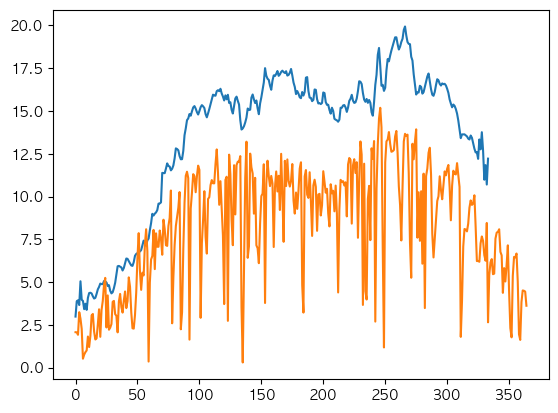

In [112]:
a.reset_index(drop=True).iloc[:,0].plot()
df_2021.reset_index(drop=True).iloc[:,1].plot()

<AxesSubplot: >

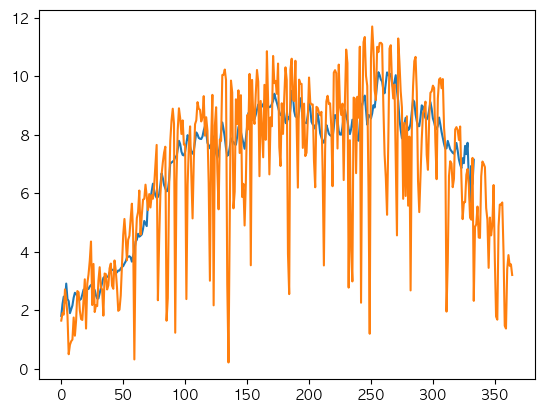

In [75]:
temp.reset_index(drop=True).iloc[:,1].plot()
df_2021.reset_index(drop=True).iloc[:,1].plot()

In [39]:
def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

In [40]:
for col in ans.columns:
    ans[col][7:-7] = smooth(ans[col],7)[7:-7]

/var/folders/r1/58cpj4hx7j75vx_3j1y6vpvw0000gn/T/ipykernel_26422/3862232856.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  ans[col][7:-7] = smooth(ans[col],7)[7:-7]


<AxesSubplot: >

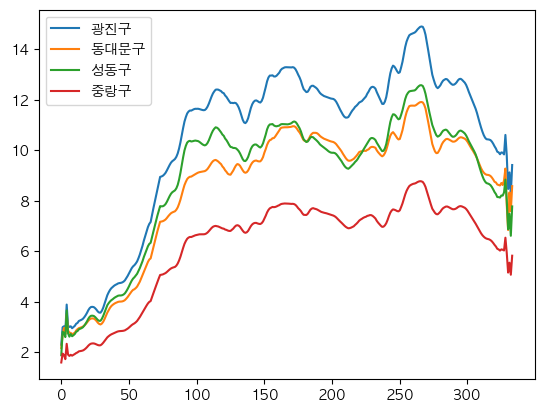

In [41]:
ans.reset_index(drop=True).plot()

In [133]:
df['year']=df.reset_index()['일시'].apply(lambda x: str(x)[:4]).values

In [134]:
df_2018=df[df['year']=='2018']
df_2019=df[df['year']=='2019']
df_2020=df[df['year']=='2020']
df_2021=df[df['year']=='2021']

<AxesSubplot: >

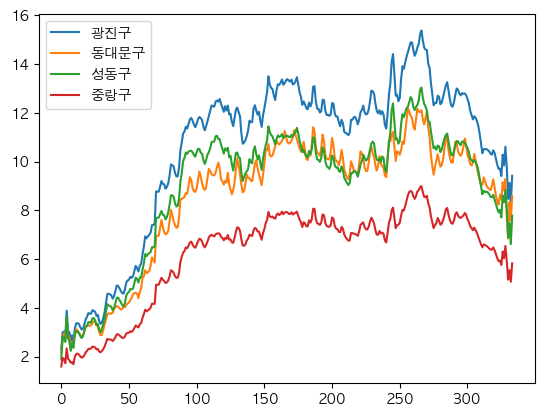

In [136]:
ans.reset_index(drop=True).plot()

In [138]:
def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

In [139]:
from sklearn.metrics import mean_absolute_error

<AxesSubplot: >

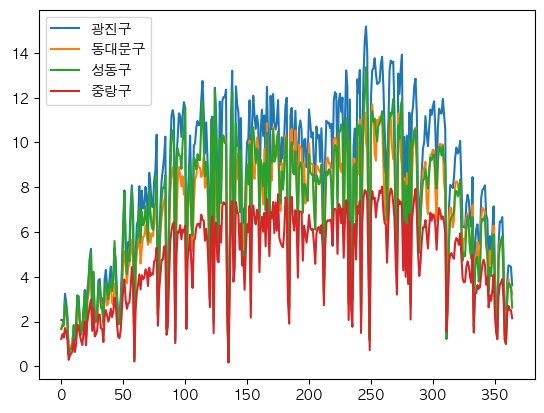

In [146]:
df_2021.reset_index(drop=True).iloc[:,:-1].plot()

In [ ]:
for months,rain in zip([[3,4,5],[6,7,8],[9,10,11]],[31,34,23]):
    temp=df_2018[df_2018['월'].isin(months)]
    for location in ['광진구','동대문구','성동구','중랑구']:
        temp.loc[temp[temp['월'].isin(months)][location].nsmallest(rain).index,location] = np.NaN
        temp[location]=temp[location].interpolate(method='time').fillna(method='bfill').fillna(method='ffill')
    df_2018[df_2018['월'].isin(months)] = temp
for months,rain in zip([[3,4,5],[6,7,8],[9,10,11]],[17,39,23]):
    temp=df_2019[df_2019['월'].isin(months)]
    for location in ['광진구','동대문구','성동구','중랑구']:
        temp.loc[temp[temp['월'].isin(months)][location].nsmallest(rain).index,location] = np.NaN
        temp[location]=temp[location].interpolate(method='time').fillna(method='bfill').fillna(method='ffill')
    df_2019[df_2019['월'].isin(months)] = temp
for months,rain in zip([[3,4,5],[6,7,8],[9,10,11]],[20,46,20]):
    temp=df_2020[df_2020['월'].isin(months)]
    for location in ['광진구','동대문구','성동구','중랑구']:
        temp.loc[temp[temp['월'].isin(months)][location].nsmallest(rain).index,location] = np.NaN
        temp[location]=temp[location].interpolate(method='time').fillna(method='bfill').fillna(method='ffill')
    df_2020[df_2020['월'].isin(months)] = temp
for months,rain in zip([[3,4,5],[6,7,8],[9,10,11]],[35,34,25]):
    temp=df_2021[df_2021['월'].isin(months)]
    for location in ['광진구','동대문구','성동구','중랑구']:
        temp.loc[temp[temp['월'].isin(months)][location].nsmallest(rain).index,location] = np.NaN
        temp[location]=temp[location].interpolate(method='time').fillna(method='bfill').fillna(method='ffill')
    df_2021[df_2021['월'].isin(months)] = temp